# Trabalho Prático 1 de Ciência de Dados

## Download e leitura

#### Download dos dados

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg' -O filmes.csv

--2025-02-04 09:56:15--  https://docs.google.com/uc?export=download&id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg
Resolving docs.google.com (docs.google.com)... 2800:3f0:4004:809::200e, 142.250.79.46
Connecting to docs.google.com (docs.google.com)|2800:3f0:4004:809::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg&export=download [following]
--2025-02-04 09:56:16--  https://drive.usercontent.google.com/download?id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 2800:3f0:4004:805::2001, 142.250.79.161
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|2800:3f0:4004:805::2001|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11380332 (11M) [application/octet-stream]
Saving to: ‘filmes.csv’

filmes.csv          100%[===================>]  10,85M  4,26MB/s   

#### Leitura dos dados

In [1]:
import pandas as pd

filmes_df = pd.read_csv("filmes.csv")
filmes_df.head()

,genres,averageRating,numVotes,sinopse,primaryTitle,startYear,runtimeMinutes,actors_names,directors_names
0,Family,7.1,387992,When two kids find and play a magical board ga...,Jumanji,1995,104,['Robin Williams' 'Jonathan Hyde' 'Jonathan Hy...,['Joe Johnston']
1,Romance,6.7,30265,John and Max resolve to save their beloved bai...,Grumpier Old Men,1995,101,['Walter Matthau' 'Jack Lemmon' 'Burgess Mered...,['Howard Deutch']
2,Romance,6.0,12585,"Based on Terry McMillan's novel, this film fol...",Waiting to Exhale,1995,124,['Gregory Hines' 'Dennis Haysbert' 'Mykelti Wi...,['Forest Whitaker']
3,"Romance,Family",6.1,42555,George Banks must deal not only with his daugh...,Father of the Bride Part II,1995,106,['Steve Martin' 'Martin Short' 'George Newbern...,['Charles Shyer']
4,"Crime,Action",8.3,738636,A group of high-end professional thieves start...,Heat,1995,170,['Al Pacino' 'Robert De Niro' 'Val Kilmer' 'Jo...,['Michael Mann']


## Pré-processamento dos dados

In [2]:
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /home/miguel/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
from nltk import sent_tokenize, word_tokenize

#### Extrair sinopse do dataframe

In [4]:
sinopses = filmes_df.sinopse
sinopses.head()

0    When two kids find and play a magical board ga...
1    John and Max resolve to save their beloved bai...
2    Based on Terry McMillan's novel, this film fol...
3    George Banks must deal not only with his daugh...
4    A group of high-end professional thieves start...
Name: sinopse, dtype: object

In [5]:
sinopses.shape

(30358,)

#### Convertendo os tokens

In [6]:
!pip install unidecode

In [7]:
import string
import unidecode

Convertendo todos os tokens para letras minúsculas

In [8]:
def tokens_low(tokens):
  return [w.lower() for w in tokens]

Removendo os símbolos de pontuação

In [9]:
table = str.maketrans('', '', string.punctuation)

In [10]:
def tokens_pontuacao(tokens):
  return [w.translate(table) for w in tokens]

Convertendo carcteres especiais

In [11]:
def tokens_char_especical(tokens):
  return [unidecode.unidecode(w).lower() for w in tokens]

#### Filtrando apenas palavras

Extraindo apenas as palavras da lista de tokens

In [12]:
def tokens_apenas_words(tokens):
  return [word for word in tokens if word.isalpha()]

Removendo stop words

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/miguel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
def tokens_stop_words(tokens):
  return [word for word in tokens if not word in stop_words]

#### Stemming

In [16]:
from nltk.stem.porter import PorterStemmer

In [17]:
porter = PorterStemmer()

In [18]:
def tokens_stemming(tokens):
  return [porter.stem(word) for word in tokens]

#### Tokenizer Personalizado

In [19]:
def tokenizer_personalizado(texto):
  tokens = word_tokenize(texto)

  tokens = tokens_low(tokens)
  tokens = tokens_pontuacao(tokens)
  tokens = tokens_char_especical(tokens)
  tokens = tokens_apenas_words(tokens)
  tokens = tokens_stop_words(tokens)
  tokens = tokens_stemming(tokens)

  return tokens

## Construção da matriz de TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# Cada linha do array é uma sinopse
D = [sin for sin in filmes_df.sinopse]

### Usando Tokenizer Personalizado

In [22]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer_personalizado)
X = vectorizer.fit_transform(D)

/home/miguel/anaconda3/envs/data-science/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [23]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
vectorizer.get_feature_names_out()

array(['aa', 'aadhavan', 'aadhi', ..., 'zylberberg', 'zylberstein',
       'zyto'], dtype=object)

In [25]:
df = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out())
df

,aa,aadhavan,aadhi,aakansha,aakash,aaliya,aalst,aaltonen,aamir,aang,...,zuzu,zvezda,zweig,zydruna,zyga,zygon,zyl,zylberberg,zylberstein,zyto
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Usando o Padrão da Bibilioteca

In [26]:
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(D)

In [27]:
# X.todense()

In [28]:
# vectorizer.get_feature_names_out()

In [29]:
# df = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out())
# df

## Redução de dimensionalidade

In [ ]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)
X_REDUCED = pca.fit_transform(X)

In [44]:
y = filmes_df.genres
y

0                Family
1               Romance
2               Romance
3        Romance,Family
4          Crime,Action
              ...      
30353         Biography
30354         Biography
30355      Crime,Horror
30356           Romance
30357            Action
Name: genres, Length: 30358, dtype: object

In [50]:
genres_types = []

for g in y:
    if g not in genres_types:
        genres_types.append(g)

len(genres_types)

73

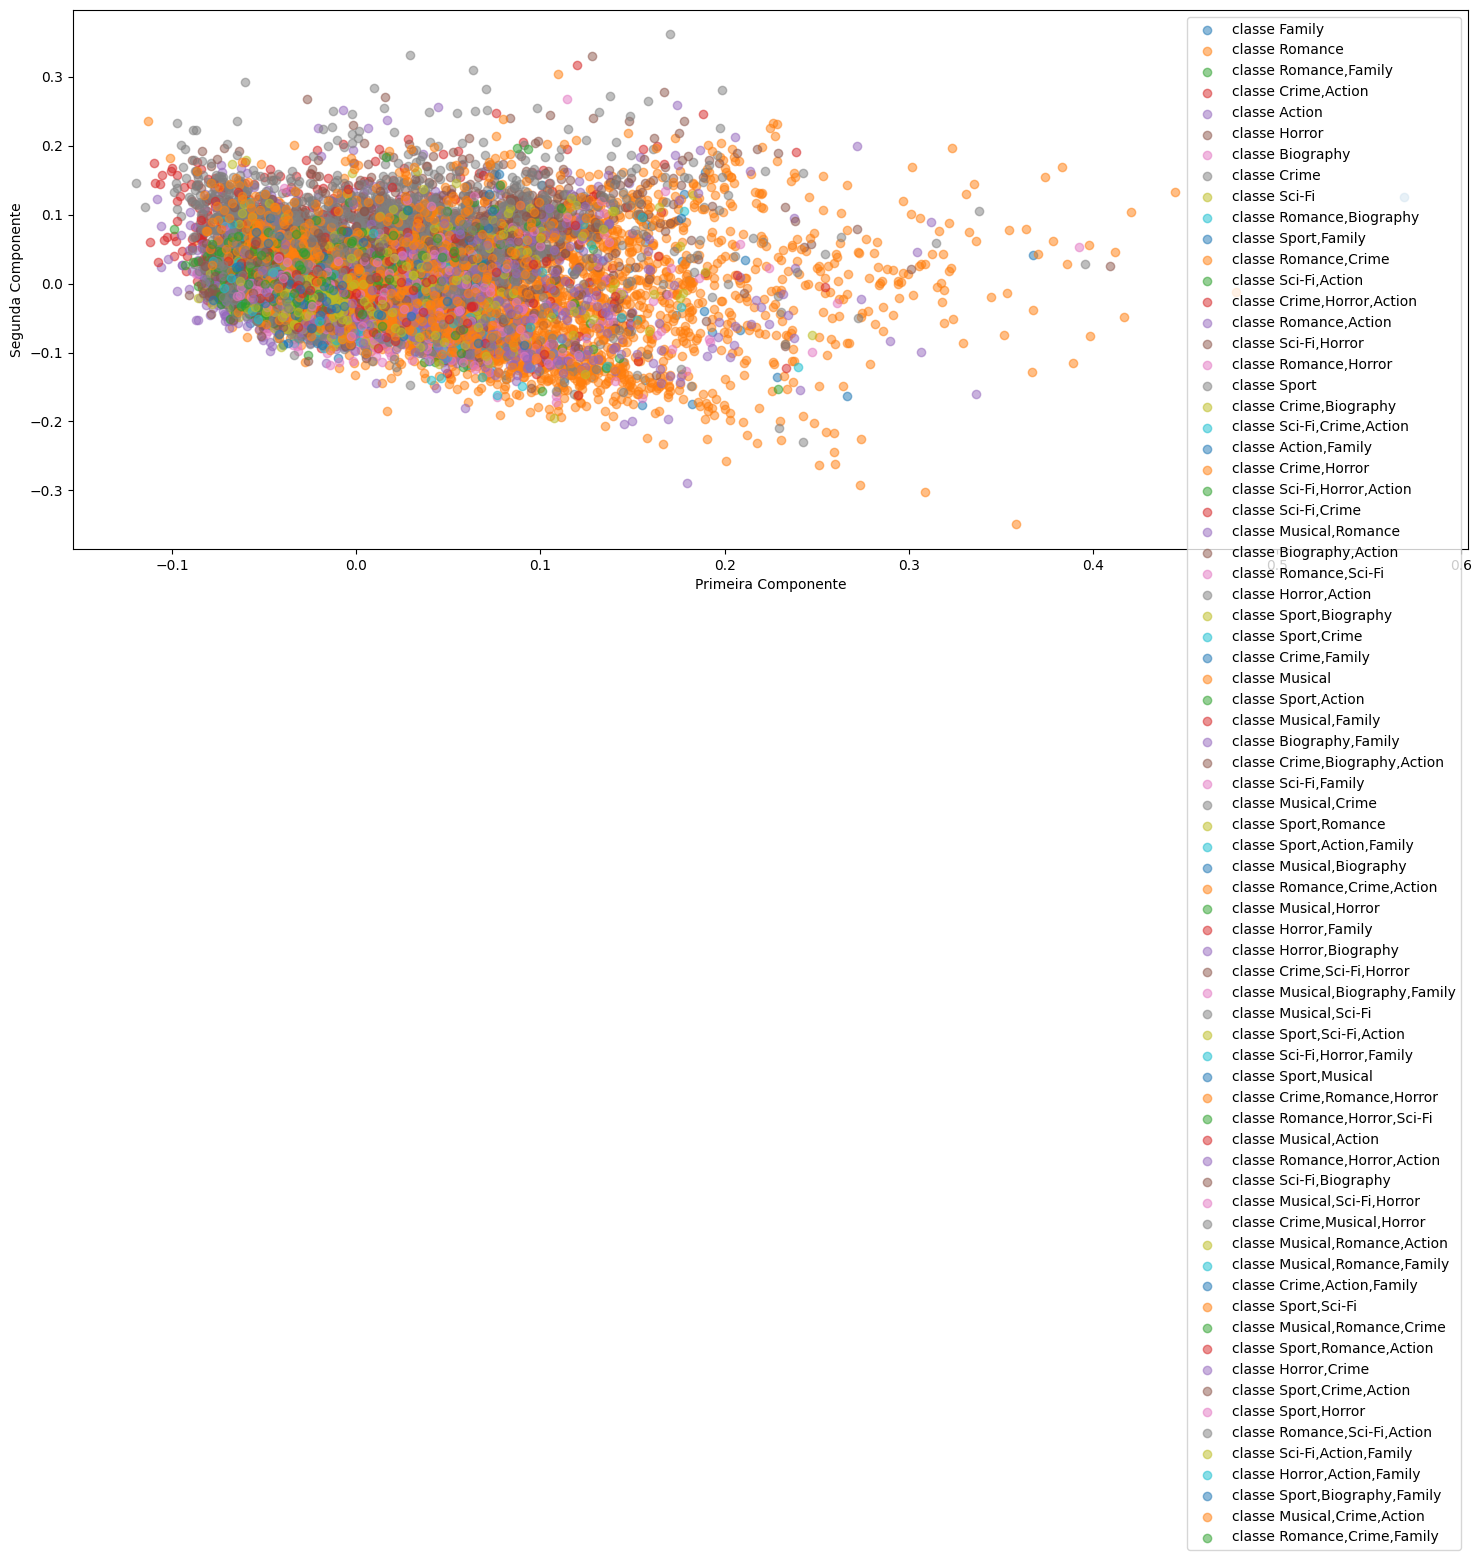

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 7))

for l in genres_types:
  plt.scatter(X_REDUCED[y == l, 0], X_REDUCED[y == l, 1], label="classe %s" % l, alpha=0.5)

plt.xlabel('Primeira Componente');
plt.ylabel('Segunda Componente');
plt.legend(loc = 'best');

In [42]:
df_reduced = pd.DataFrame(X_REDUCED)
df_reduced

,0,1
0,0.017256,0.033533
1,-0.031934,-0.013413
2,-0.012075,-0.059076
3,-0.028460,0.021758
4,-0.041186,-0.010381
...,...,...
30353,-0.006467,-0.032486
30354,-0.033859,-0.042803
30355,-0.050030,-0.000872
30356,0.128207,0.100914
